<a href="https://colab.research.google.com/github/vanithakattumuri/PAMI/blob/main/notebooks/fuzzyFrequentPattern/basic/FFIMiner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding Frequent patterns in Fuzzy Databases using FFIMiner

This tutorial has two parts. In the first part, we describe the basic approach to find Frequent patterns in a fuzzy database using the FFIMiner algorithm. In the final part, we describe an advanced approach, where we evaluate the FFIMiner algorithm on a dataset at different minimum support threshold values.
***

# Prerequisites:

1.   Installing the PAMI library

In [ ]:
!pip install -U pami #install the pami repository

2.   Downloading a sample dataset

In [ ]:
!wget -nc https://u-aizu.ac.jp/~udayrage/datasets/fuzzyDatabases/Fuzzy_T10I4D100K.csv #download a sample fuzzy database

File ‘Fuzzy_T10I4D100K.csv’ already there; not retrieving.



3.   Printing few lines of a dataset to know its format.

In [ ]:
!head -2 Fuzzy_T10I4D100K.csv

25.L	25.M	52.H	164.H	240.H	274.H	328.L	368.H	448.H	538.H	561.H	630.H	687.H	730.H	775.H	825.H	834.H:0.4	0.6	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	 
39.H	120.H	124.H	205.H	401.H	581.H	704.H	814.H	825.H	834.H:1	1	1	1	1	1	1	1	1	1	 


format: every row contains items seperated by a seperator.

Example:

item1 item2 item3 item4

item1 item4 item6
***

## Part 1: Finding Frequent patterns using FFIMiner

### Step 1: Understanding the statistics of a database to choose an appropriate minimum support (minSup) value.

In [ ]:
#import the class file
import PAMI.extras.dbStats.fuzzyDatabaseStats as stats

#specify the file name
inputFile = 'Fuzzy_T10I4D100K.csv'

#initialize the class
obj=stats.fuzzyDatabaseStats(inputFile,sep='\t')

#execute the class
obj.run()

#Printing each of the database statistics
print(f'Database size : {obj.getDatabaseSize()}')
print(f'Total number of items : {obj.getTotalNumberOfItems()}')
print(f'Database sparsity : {obj.getSparsity()}')
print(f'Minimum Transaction Size : {obj.getMinimumTransactionLength()}')
print(f'Average Transaction Size : {obj.getAverageTransactionLength()}')
print(f'Maximum Transaction Size : {obj.getMaximumTransactionLength()}')
print(f'Standard Deviation Transaction Size : {obj.getStandardDeviationTransactionLength()}')
print(f'Variance in Transaction Sizes : {obj.getVarianceTransactionLength()}')

#saving the distribution of items' frequencies and transactional lengths
itemFrequencies = obj.getSortedListOfItemFrequencies()
transactionLength = obj.getTransanctionalLengthDistribution()
obj.save(itemFrequencies, 'itemFrequency.csv')
obj.save(transactionLength, 'transactionSize.csv')

#Alternative apporach to print all of the database statistics and plot them
# obj.printStats()
# obj.plotGraphs()

Database size : 100000
Total number of items : 2587
Database sparsity : 0.9957800850405876
Minimum Transaction Size : 1
Average Transaction Size : 10.91692
Maximum Transaction Size : 32
Standard Deviation Transaction Size : 4.05667569736601
Variance in Transaction Sizes : 16.456782281422814


### Step 2: Draw the item's frequency graph and transaction length's distribution graphs for more information

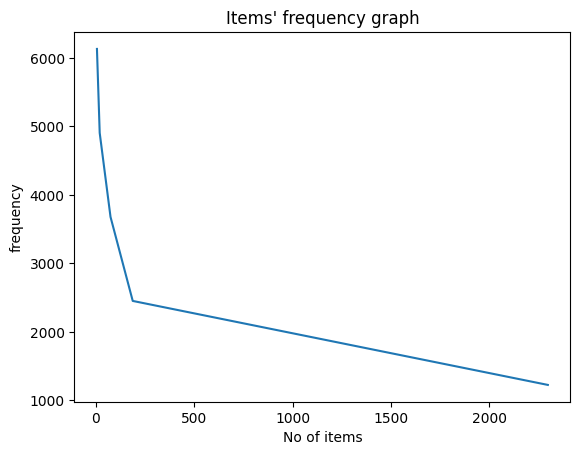

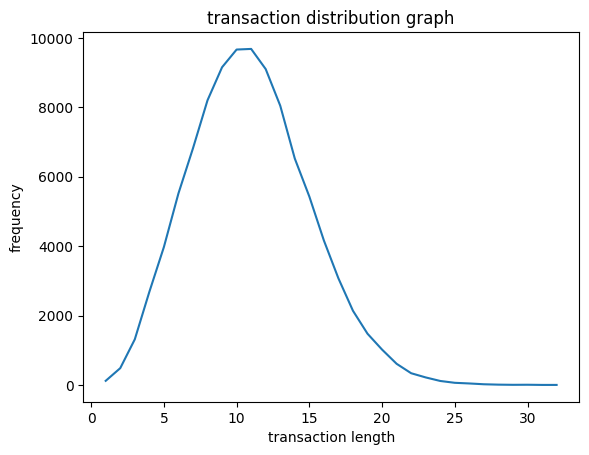

In [ ]:
import PAMI.extras.graph.plotLineGraphFromDictionary as plt

itemFrequencies = obj.getFrequenciesInRange()
transactionLength = obj.getTransanctionalLengthDistribution()
plt.plotLineGraphFromDictionary(itemFrequencies, end = 100, title = 'Items\' frequency graph', xlabel = 'No of items', ylabel= 'frequency')
plt.plotLineGraphFromDictionary(transactionLength, end = 100, title = 'transaction distribution graph', xlabel = 'transaction length', ylabel = 'frequency')

### Step 3: Choosing an appropriate *minSup* value

_Observations_

  1. The input dataset is sparse as the sparsity value is 0.988 (=98.8%)
  2. Many items have low frequencies as seen in the items' frequency graph
  3. The dataset is not high dimensional as the inverted curve is around 10.

  Based on the above observations, let us choose a _minSup_ value of 100 (in count). We can increase or decrease the _minSup_ based on the number of patterns being generated.

In [ ]:
minimumSupportCount = 1000  #minSup is specified in count. However, the users can also specify minSup between 0 and 1.

### Step 4: Mining Frequent patterns using FFIMiner

In [ ]:
from PAMI.fuzzyFrequentPattern.basic import FFIMiner  as alg #import the algorithm

obj = alg.FFIMiner(iFile=inputFile, minSup=minimumSupportCount, sep='\t') #initialize
obj.startMine()            #start the mining process

obj.save('frequentPatternsAtMinSupCount100.txt') #save the patterns


frequentPatternsDF= obj.getPatternsAsDataFrame() #get the generated frequent patterns as a dataframe
print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Total No of patterns: 359
Runtime: 514.0772252082825
Memory (RSS): 803160064
Memory (USS): 756387840


### Step 5: Investigating the generated patterns

Open the pattern's file and investigate the generated patterns. If the generated patterns were interesting, use them; otherwise, redo the Steps 3 and 4 with a different _minSup_ value.

In [11]:
!head 'frequentPatternsAtMinSupCount100.txt'

173.H:1002.6 
105.H:1005.4 
708.H:1005.4000000000001 
790.H:1006.6 
126.H:1007.8000000000001 
628.H:1011.6 
361.H:1016.4 
992.H:1016.8000000000001 
567.H:1016.8000000000002 
554.H:1021.4000000000001 


The storage format is: _frequentPattern:support_
***

## Part 2: Evaluating the FFIMiner algorithm on a dataset at different minSup values

### Step 1: Import the libraries and specify the input parameters

In [12]:
#Import the libraries
from PAMI.fuzzyFrequentPattern.basic import FFIMiner  as alg #import the algorithm
import pandas as pd

#Specify the input parameters
inputFile = 'Fuzzy_T10I4D100K.csv'
seperator='\t'
minimumSupportCountList = [1000, 1500, 2000, 2500, 3000]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

### Step 2: Create a data frame to store the results of FFIMiner

In [13]:
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of FFIMiner algorithm

### Step 3: Execute the algorithm at different minSup values

In [14]:
for minSupCount in minimumSupportCountList:
    obj = alg.FFIMiner(inputFile, minSup=minSupCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['FFIMiner', minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

### Step 4: Print the Result

In [15]:
print(result)

  algorithm  minSup  patterns     runtime     memory
0  FFIMiner    1000       359  532.860051  804249600
1  FFIMiner    1500       208  233.302066  769220608
2  FFIMiner    2000       130  114.065191  742420480
3  FFIMiner    2500        86   58.360385  721731584
4  FFIMiner    3000        46   19.221605  700276736


### Step 5: Visualizing the results

<Axes: xlabel='minSup'>

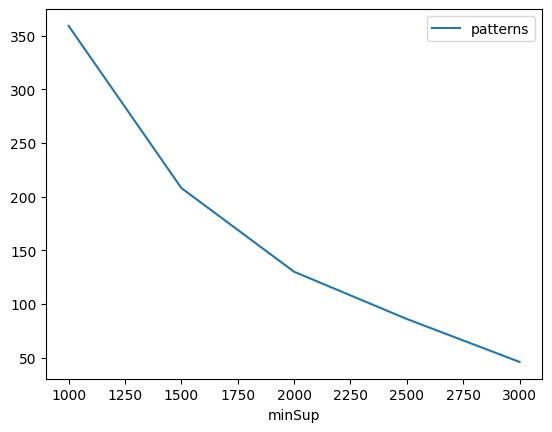

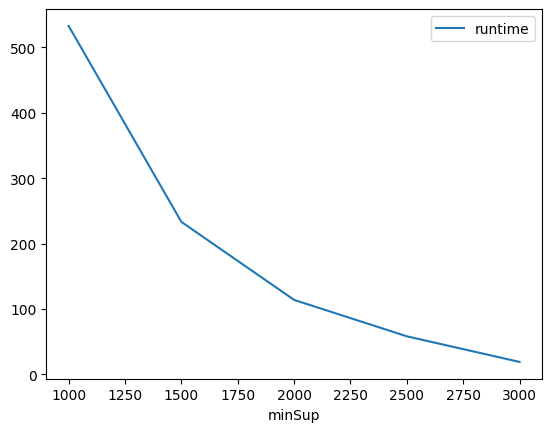

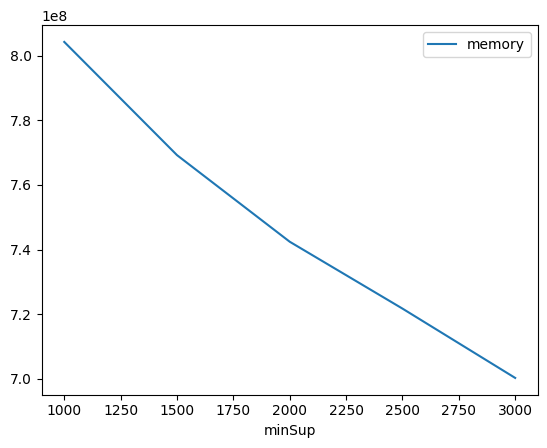

In [16]:
result.plot(x='minSup', y='patterns', kind='line')
result.plot(x='minSup', y='runtime', kind='line')
result.plot(x='minSup', y='memory', kind='line')

#Graphs can be improved further by using additional packages, such as plotly and matplotlib